In [426]:
import pandas as pd
import numpy as np
import seaborn as sns

In [427]:
!curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
         % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
       

                          Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0                          Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  291k  100  291k    0     0  1095k      0 --:--:-- --:--:-- --:--:-- 1096k
100  291k  100  291k    0     0  1095k      0 --:--:-- --:--:-- --:--:-- 1096k


In [428]:
df = pd.read_csv('laptops.csv')

In [429]:
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [430]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [431]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


### EDA

* Look at the `final_price` variable. Does it have a long tail? 


<Axes: xlabel='final_price', ylabel='Count'>

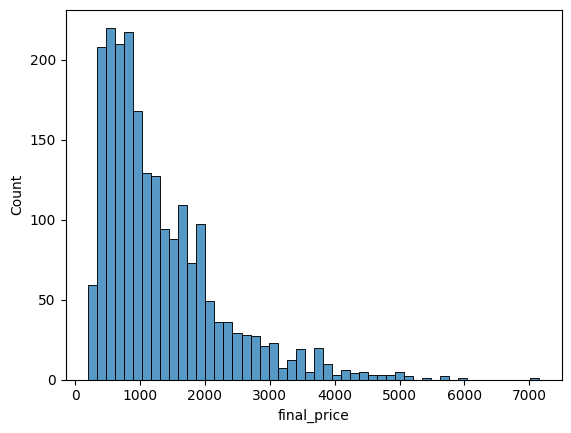

In [432]:
sns.histplot(df.final_price, bins=50)

<Axes: xlabel='final_price', ylabel='Count'>

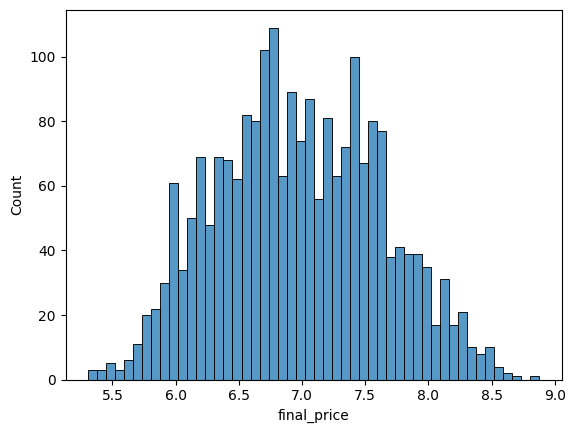

In [433]:
sns.histplot(np.log1p(df.final_price), bins=50)

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [434]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [435]:
df['ram'].median()

16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [436]:
np.random.seed(42)
n = len(df)
idx  = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [437]:
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [438]:
n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n-n_test-n_val
n_test, n_val, n_train

(432, 432, 1296)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [439]:
df_test = df.iloc[idx[:n_test]]
df_val = df.iloc[idx[n_test: n_test + n_val]]
df_train = df.iloc[idx[n_test + n_val:]]

df_test = df_test.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_train = df_train.reset_index(drop= True)

In [440]:
y_test = np.log1p(df_test.final_price.to_numpy())
y_val = np.log1p(df_val.final_price.to_numpy())
y_train = np.log1p(df_train.final_price.to_numpy())

In [441]:
#Here, I did not perform the normalization of the target variable by taking its logarithm.
y_test = df_test.final_price.to_numpy()
y_val = df_val.final_price.to_numpy()
y_train = df_train.final_price.to_numpy()

#### <span style="color: magenta;">OPTION #1: fillna with 0</span>

In [442]:
def fillw0 (df):
    df = df.copy()
    df['screen'] = df['screen'].fillna(0)
    return df

In [443]:
X_test = fillw0(df_test).drop(columns='final_price')
X_val = fillw0(df_val).drop(columns='final_price')
X_train = fillw0(df_train).drop(columns='final_price')

In [444]:
features = list(X_test.columns)
features

['ram', 'storage', 'screen']

In [445]:
def prepare_X(df):
    df_num = df[features]

    X = df_num.values
    return X

In [446]:
X_test = prepare_X(X_test)
X_val = prepare_X(X_val)
X_train = prepare_X(X_train)

In [447]:
X_test

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. , 1000. ,   15.6],
       [   8. ,  512. ,   15. ]])

In [448]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [449]:
train_linear_regression(X_train, y_train)

(638.3199818311485, array([ 42.34335173,   0.98186949, -38.43901999]))

In [450]:
w0, w = train_linear_regression(X_train, y_train)

In [451]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

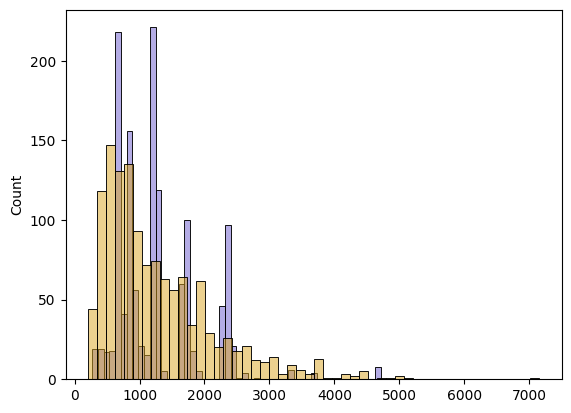

In [452]:
sns.histplot(y_pred, color='#6A5ACD', alpha=0.5, bins=50)
sns.histplot(y_train, color='#DAA520',  alpha=0.5, bins=50)



In [453]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [454]:
rmse(y_train, y_pred)

549.918980180076

In [455]:
y_pred = w0 + X_val.dot(w)

In [456]:
rmse_0_score = round(rmse(y_val, y_pred), 2)
rmse_0_score

670.0

<Axes: ylabel='Count'>

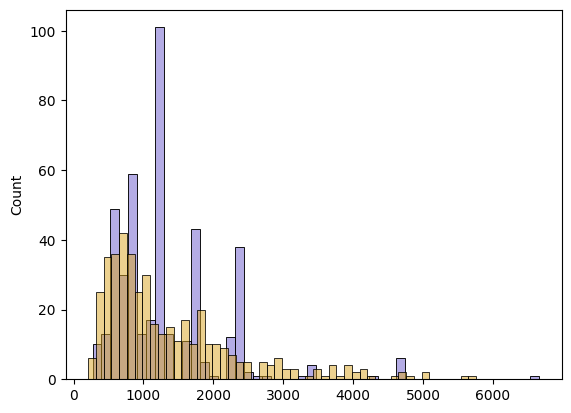

In [457]:
sns.histplot(y_pred, color='#6A5ACD', alpha=0.5, bins=50)
sns.histplot(y_val, color='#DAA520',  alpha=0.5, bins=50)

#### <span style="color: gold;">OPTION #1: fillna with train set mean</span>


In [458]:
mean_screen = df_train['screen'].mean()
mean_screen

15.180974477958237

In [459]:
def fillwavg (df):
    df = df.copy()
    df['screen'] = df['screen'].fillna(mean_screen)
    return df

In [460]:
X_test = fillwavg(df_test).drop(columns='final_price')
X_val = fillwavg(df_val).drop(columns='final_price')
X_train = fillwavg(df_train).drop(columns='final_price')

In [461]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

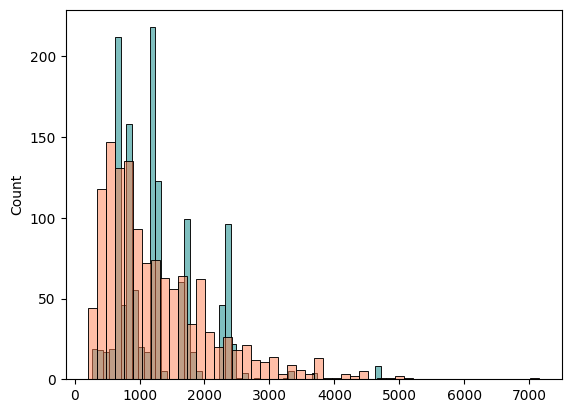

In [462]:
sns.histplot(y_pred, color='#008080', alpha=0.5, bins=50)
sns.histplot(y_train, color='#FF7F50',  alpha=0.5, bins=50)

In [463]:
rmse(y_train, y_pred)

550.4087163306898

In [464]:
rmse_mean_score = round(rmse(y_train, y_pred), 2)
rmse_mean_score

550.41

In [465]:
print(f'RMSE when the NAN values are filled with 0 than the RMSE is {rmse_0_score}')
print(f'RMSE when the NAN values are filled with MEAN than the RMSE is {rmse_mean_score}')

RMSE when the NAN values are filled with 0 than the RMSE is 670.0
RMSE when the NAN values are filled with MEAN than the RMSE is 550.41
RMSE when the NAN values are filled with 0 than the RMSE is 670.0
RMSE when the NAN values are filled with MEAN than the RMSE is 550.41



### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [466]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [467]:
X_test = fillw0(df_test).drop(columns='final_price')
X_val = fillw0(df_val).drop(columns='final_price')
X_train = fillw0(df_train).drop(columns='final_price')

In [468]:
X_test = prepare_X(X_test)
X_val = prepare_X(X_val)
X_train = prepare_X(X_train)

In [469]:
dictionary = {}

for i in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, i)

    y_pred = w0 + X_val.dot(w)

    x = round(rmse(y_val, y_pred), 2)

    dictionary.update({i:x})

    #print(f'the RMSE for r = {i:<10} is {x}')

sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse= False))

print()

for key, value in sorted_dict.items():
    print(f'the value for {key:<10} is {value}')


the value for 5          is 669.91
the value for 1          is 669.93
the value for 0.1        is 669.99
the value for 0          is 670.0
the value for 0.01       is 670.0
the value for 10         is 670.02
the value for 100        is 670.8


the value for 5          is 669.91
the value for 1          is 669.93
the value for 0.1        is 669.99
the value for 0          is 670.0
the value for 0.01       is 670.0
the value for 10         is 670.02
the value for 100        is 670.8


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [470]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[['ram', 'storage', 'screen', 'final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [471]:
df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [472]:
def fillw0 (df):
    df = df.copy()
    df['screen'] = df['screen'].fillna(0)
    return df

In [473]:
scores = []


def linear_regression(df, random_seed):

    df = fillw0(df)
    
    np.random.seed(random_seed)

    n = len(df)

    idx  = np.arange(n)

    np.random.shuffle(idx)

    n_test = int(n*0.2)
    n_val = int(n*0.2)
    n_train = n-n_test-n_val

    df_test = df.iloc[idx[:n_test]]
    df_val = df.iloc[idx[n_test: n_test + n_val]]
    df_train = df.iloc[idx[n_test + n_val:]]
    
    df_test = df_test.reset_index(drop= True)
    df_val = df_val.reset_index(drop= True)
    df_train = df_train.reset_index(drop= True)

    y_test = df_test.final_price.to_numpy()
    y_val = df_val.final_price.to_numpy()
    y_train = df_train.final_price.to_numpy()
    
    X_test = df_test.drop(columns='final_price')
    X_val = df_val.drop(columns='final_price')
    X_train = df_train.drop(columns='final_price')

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)

    x = rmse(y_val, y_pred)

    scores.append(x)

random_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in random_seeds:
    linear_regression(df, i)

standard_deviation = round(np.std(scores), 3)
standard_deviation


44.306

In [474]:
scores

[560.3436431079115,
 640.0080239090236,
 577.0998451644509,
 535.221981347126,
 626.7031994744793,
 556.7649273792028,
 598.6485159846454,
 642.924094812718,
 639.3912765742201,
 677.8470389380703]

In [475]:
np.std(scores)

44.30617350342555

In [476]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [477]:
scores = []


def linear_regression_reg(df, random_seed, reg):

    df = fillw0(df)
    
    np.random.seed(random_seed)

    n = len(df)

    idx  = np.arange(n)

    np.random.shuffle(idx)

    n_test = int(n*0.2)
    n_val = int(n*0.2)
    n_train = n-n_test-n_val

    df_test = df.iloc[idx[:n_test]]
    df_val = df.iloc[idx[n_test: n_test + n_val]]
    df_train = df.iloc[idx[n_test + n_val:]]
    
    df_test = df_test.reset_index(drop= True)
    df_val = df_val.reset_index(drop= True)
    df_train = df_train.reset_index(drop= True)

    y_test = df_test.final_price.to_numpy()
    y_val = df_val.final_price.to_numpy()
    y_train = df_train.final_price.to_numpy()
    
    X_test = df_test.drop(columns='final_price')
    X_val = df_val.drop(columns='final_price')
    X_train = df_train.drop(columns='final_price')

    w0, w = train_linear_regression_reg(X_train, y_train, reg)

    y_pred = w0 + X_val.dot(w)

    x = rmse(y_val, y_pred)

    return x

reg = 0.001

random_seeds = 9

linear_regression_reg(df, random_seeds, reg)

print(x)


670.8
670.8


In [478]:
def linear_regression_reg(df, random_seed, reg):
    df = fillw0(df)
    
    np.random.seed(random_seed)
    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)

    n_test = int(n * 0.2)
    n_val = int(n * 0.2)
    n_train = n - n_test - n_val

    df_test = df.iloc[idx[:n_test]]
    df_val = df.iloc[idx[n_test: n_test + n_val]]
    df_train = df.iloc[idx[n_test + n_val:]]

    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_train = df_train.reset_index(drop=True)

    y_test = df_test.final_price.to_numpy()
    y_val = df_val.final_price.to_numpy()
    y_train = df_train.final_price.to_numpy()

    X_test = df_test.drop(columns='final_price')
    X_val = df_val.drop(columns='final_price')
    X_train = df_train.drop(columns='final_price')

    w0, w = train_linear_regression_reg(X_train, y_train, reg)

    y_pred = w0 + X_val.dot(w)

    x = rmse(y_val, y_pred)
    
    return x  # Return x

# Then call the function and capture the return value
reg = 0.001
random_seeds = 9

x = linear_regression_reg(df, random_seeds, reg)  # Store the result in x

print(x)  # Now you can print x


677.8470327373406
677.8470327373406


In [479]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [480]:
# List to store RMSE scores
rmse_scores = []

# List of seeds to try
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
    # Split the data into train/validation/test with 60%/20%/20% distribution
    train, temp = train_test_split(df, test_size=0.4, random_state=seed)
    validation, test = train_test_split(temp, test_size=0.5, random_state=seed)

    # Fill missing values with 0 (although the sample data doesn't have missing values)
    train.fillna(0, inplace=True)
    validation.fillna(0, inplace=True)
    test.fillna(0, inplace=True)

    # Separate features and target
    X_train = train.drop(columns=['final_price'])
    y_train = train['final_price']
    X_validation = validation.drop(columns=['final_price'])
    y_validation = validation['final_price']

    # Train the linear regression model without regularization
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_validation)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
    rmse_scores.append(rmse)

# Calculate the standard deviation of the RMSE scores
std_dev = np.std(rmse_scores)

# Round the result to 3 decimal digits
std_dev_rounded = round(std_dev, 3)

print(f"Standard Deviation of RMSE scores: {std_dev_rounded}")

Standard Deviation of RMSE scores: 35.825
Standard Deviation of RMSE scores: 35.825


# clean start ##########################£

In [481]:
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [482]:
df['screen'] = df.screen.fillna(0)
df.isna().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [483]:
df.isna().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

<Axes: xlabel='ram', ylabel='Count'>

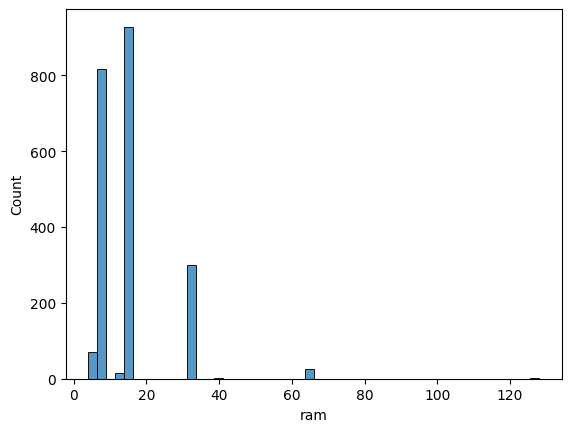

In [484]:
sns.histplot(df.ram, bins=50)

<Axes: xlabel='storage', ylabel='Count'>

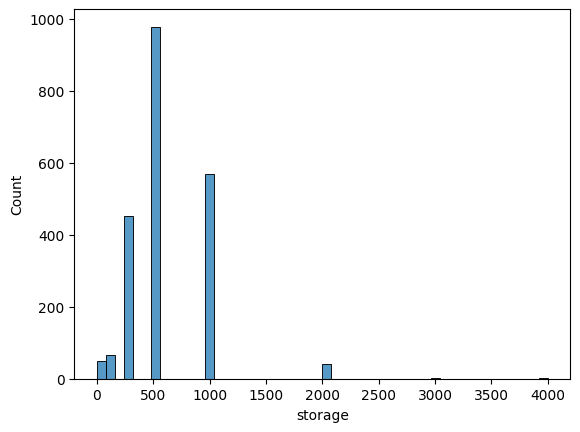

In [485]:
sns.histplot(df.storage, bins=50)

<Axes: xlabel='screen', ylabel='Count'>

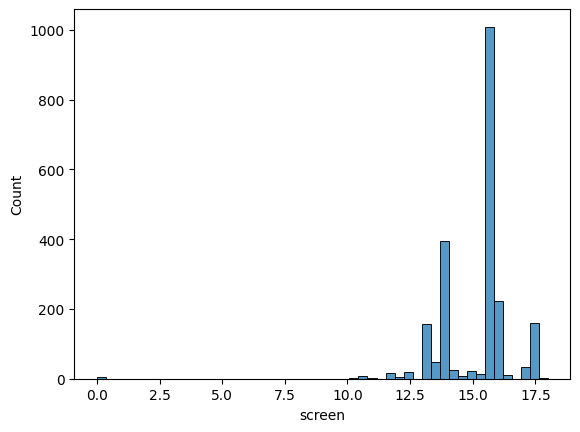

In [486]:
sns.histplot(df.screen, bins=50)

<Axes: xlabel='final_price', ylabel='Count'>

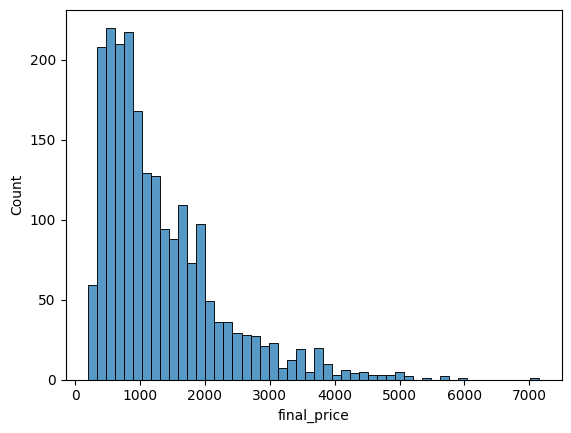

In [487]:
sns.histplot(df['final_price'], bins=50)

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [488]:
np.random.seed(9)
n = len(df)
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [489]:
np.random.shuffle(idx)
idx

array([2003,  502,  896, ...,  501,  348,  382])

In [490]:
n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n-n_test-n_val
n_test, n_val, n_train

(432, 432, 1296)

In [491]:
df.isna().sum()

ram            0
storage        0
screen         0
final_price    0
dtype: int64

In [492]:
df_test = df.iloc[idx[:n_test]]
#df_val = df.iloc[idx[n_test : n_test+n_val]]
df_train = df.iloc[idx[n_test:]]

In [493]:
y_test = df_test.final_price.to_numpy()
#y_val = df_val.final_price.to_numpy()
y_train = df_train.final_price.to_numpy()

In [494]:
X_test = df_test.drop(columns='final_price')
#X_val = df_val.drop(columns='final_price')
X_train = df_train.drop(columns='final_price')

In [495]:
def train_linear_regression_reg(X, y, r= 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [496]:
w0, w = train_linear_regression(X_train, y_train)

In [497]:
y_pred = w0 + X_test.dot(w)


In [501]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [502]:
rmse(y_test, y_pred)

535.0805999544755